In [ ]:
# Если нужен GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-385-gb968b2d7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [ ]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [ ]:
!pwd

/content/yolov5/yolov5


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oHB3zc18t62w3uBxyYop")
project = rf.workspace("main-fat2c").project("car-logos-f7sjt")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-logos-2 in yolov5pytorch:: 100%|██████████| 534/534 [00:00<00:00, 7122.35it/s]


In [ ]:
!python /content/yolov5/yolov5/train.py --batch 32 --epochs 100 --data /content/yolov5/yolov5/Car-logos-2/data.yaml --weights yolov5m.pt

2024-11-19 14:59:36.260009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-19 14:59:36.281462: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-19 14:59:36.289724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/yolov5/yolov5/Car-logos-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_

In [ ]:
!pwd

/content/yolov5/yolov5


In [ ]:
model = torch.hub.load(repo_or_dir='.',
                       model='custom',
                       path='/content/yolov5/yolov5/runs/train/exp/weights/best.pt',
                       source='local'
                       )


YOLOv5 🚀 v7.0-385-gb968b2d7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


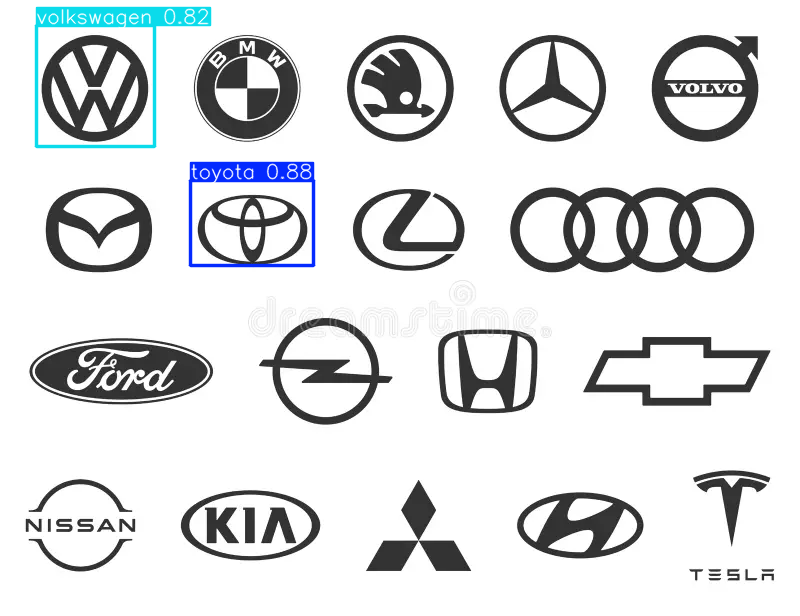

In [ ]:
import torchvision.transforms as T

# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.5
# Читаем картинку
img = T.ToPILImage()(read_image('/content/test_logo_cars3.webp'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()